<a href="https://colab.research.google.com/github/SidorenkArtem/Health_Insurance_Dataset/blob/master/XGBRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance (3).csv


In [2]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "insurance.csv" with length 55628 bytes


In [0]:
from keras.utils import to_categorical
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [0]:
data = pd.read_csv("insurance.csv")

In [0]:
data = data.fillna(data.mean())
data_new = data.copy()
le = LabelEncoder()
data_new['sex'] = le.fit_transform(data_new['sex'])
data_new['smoker'] = le.fit_transform(data_new['smoker'])
df_dummles = pd.get_dummies(data_new, columns=['region'])
data_new = np.array(df_dummles)

Преобразуем категориальные данные для упрощенной работы с ними. 

In [0]:
def visualization_result(y_test, y_pred):
  df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
  print(df)

  df1 = df.head(25)
  df1.plot(kind='bar',figsize=(16,10))
  plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
  plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
  plt.show()

In [0]:
def visualization_error(y_test, y_pred):
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Сначала я иcпользую входной массив x со всеми полями.
Произвожу разделение данных: train = 80%, test = 20%.

[02:28:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
          Actual     Predicted
0     1646.42970   2894.920410
1    11353.22760  12424.313477
2     8798.59300   9843.630859
3    10381.47870  11526.578125
4     2103.08000   2630.290771
..           ...           ...
263  40103.89000  40138.546875
264  42983.45850  44898.640625
265  44202.65360  43992.828125
266   2136.88225   3531.888672
267   5227.98875   6022.393555

[268 rows x 2 columns]


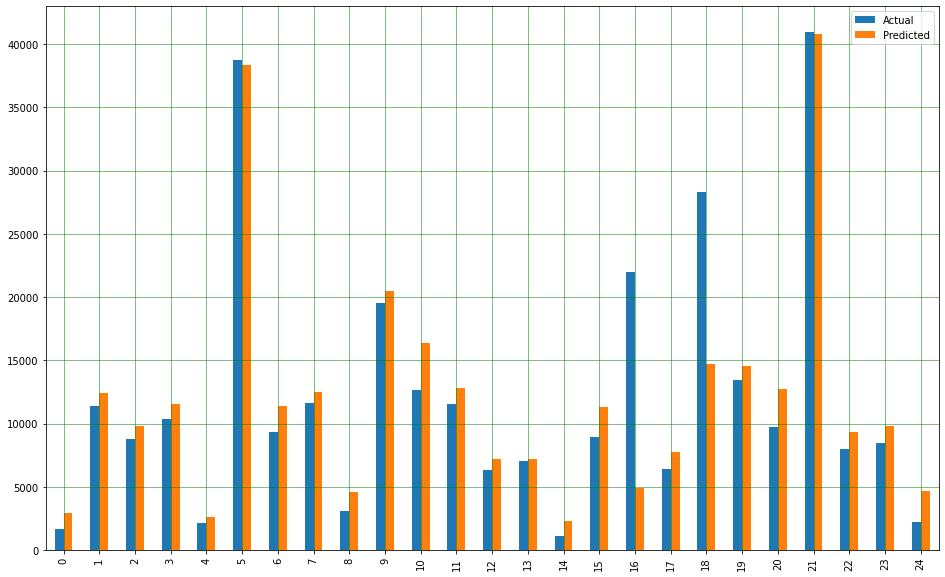

Mean Absolute Error: 2317.3588197933186
Root Mean Squared Error: 4236.691353202727


In [20]:
x = data_new[:,[0,1,2,3,4,6,7,8,9]]
y = data_new[:,[5]]
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2,random_state = 1)
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=1)
xgb_model.fit(X_train, y_train.ravel())
y_pred = xgb_model.predict(X_test)

visualization_result(y_test, y_pred)
visualization_error(y_test, y_pred)

**Улучшение 1.** 

Попробую стандартизировать поля 'bmi', 'age', 'charges', чтобы уменьшить влияние выбросов.

[02:28:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
          Actual     Predicted
0     1646.42970   2921.218262
1    11353.22760  12251.778320
2     8798.59300  10005.059570
3    10381.47870  11676.332031
4     2103.08000   2994.497559
..           ...           ...
263  40103.89000  40374.753906
264  42983.45850  45024.746094
265  44202.65360  44236.097656
266   2136.88225   3472.091309
267   5227.98875   5984.594238

[268 rows x 2 columns]


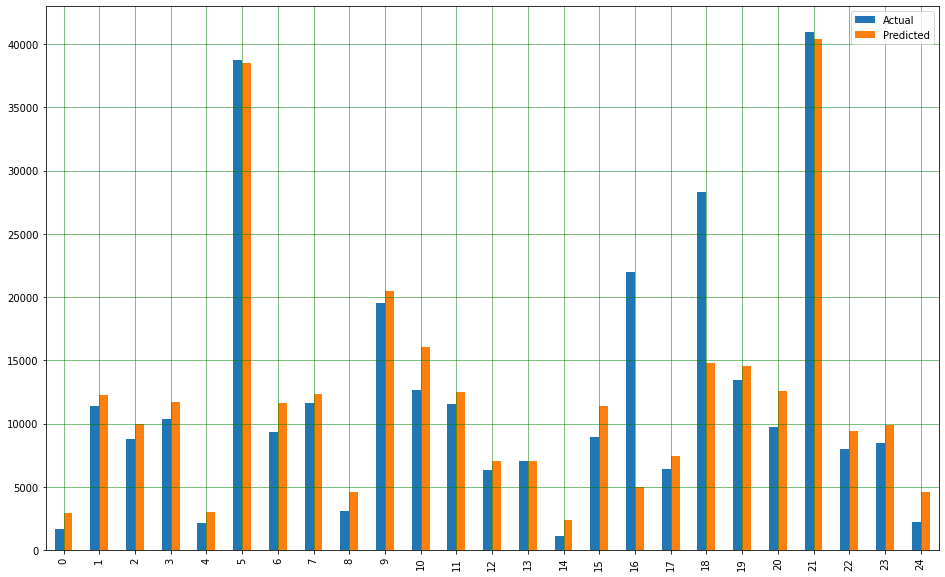

Mean Absolute Error: 2313.426736483792
Root Mean Squared Error: 4229.75981649639


In [19]:
x = data_new[:,[0,1,2,3,4,6,7,8,9]]
y = data_new[:,[5]]

scaler = StandardScaler()
scaler1 = StandardScaler()
y_train_transform = scaler.fit_transform(y)
x[:, [0]] = scaler1.fit_transform(x[:, [0]])
x[:, [1]] = scaler1.fit_transform(x[:, [1]])

X_train, X_test, y_train, y_test = train_test_split(x,y_train_transform, test_size = 0.2,random_state = 1)

xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=1)
xgb_model.fit(X_train, y_train.ravel())
y_pred = xgb_model.predict(X_test)
y_test = scaler.inverse_transform(y_test)
y_pred = scaler.inverse_transform(y_pred)

visualization_result(y_test, y_pred)
visualization_error(y_test, y_pred)

**Улучшение 2**

Теперь попробую использовать в X те метки, которые оказались более важными.
В представленном ниже примере использую метки, выделенные классификатор ExtraTreesClassifier и Boruto. Это 'age', 'bmi', 'smoker', 'children'.

[02:28:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
          Actual     Predicted
0     1646.42970   2864.848145
1    11353.22760  12202.272461
2     8798.59300  10600.547852
3    10381.47870  11879.417969
4     2103.08000   3507.568848
..           ...           ...
263  40103.89000  40640.550781
264  42983.45850  44533.984375
265  44202.65360  44393.785156
266   2136.88225   2879.915527
267   5227.98875   5201.154297

[268 rows x 2 columns]


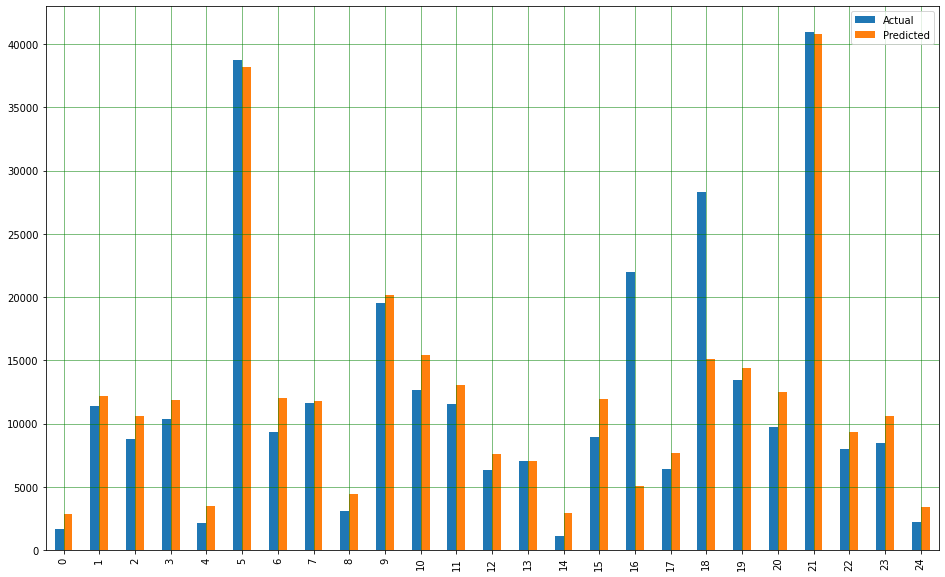

Mean Absolute Error: 2325.047677331798
Root Mean Squared Error: 4252.597999382913


In [21]:
x = data_new[:,[0,2,3,4]]
y = data_new[:,[5]]

scaler = StandardScaler()
scaler1 = StandardScaler()
y_train_transform = scaler.fit_transform(y)
x[:, [0]] = scaler1.fit_transform(x[:, [0]])
x[:, [1]] = scaler1.fit_transform(x[:, [1]])

X_train, X_test, y_train, y_test = train_test_split(x,y_train_transform, test_size = 0.2,random_state = 1)

xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=1)
xgb_model.fit(X_train, y_train.ravel())
y_pred = xgb_model.predict(X_test)
y_test = scaler.inverse_transform(y_test)
y_pred = scaler.inverse_transform(y_pred)

visualization_result(y_test, y_pred)
visualization_error(y_test, y_pred)

Из корреляционной матрицы можно выделить 'age', 'bmi', 'smoker'

[02:28:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
          Actual     Predicted
0     1646.42970   3307.593262
1    11353.22760  12916.676758
2     8798.59300  10944.799805
3    10381.47870  11585.686523
4     2103.08000   3491.813965
..           ...           ...
263  40103.89000  40630.246094
264  42983.45850  44357.851562
265  44202.65360  44357.851562
266   2136.88225   3987.334473
267   5227.98875   6126.854004

[268 rows x 2 columns]


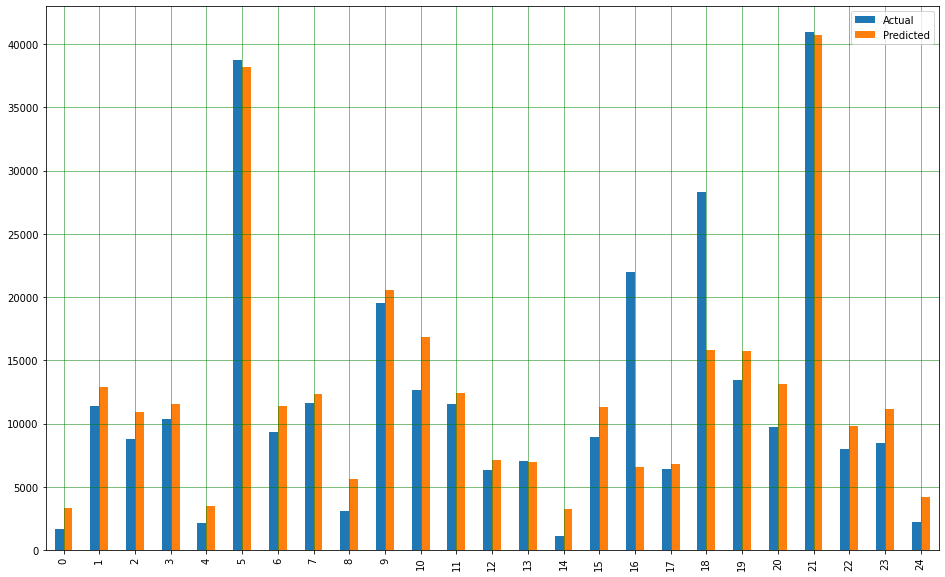

Mean Absolute Error: 2493.9136253458782
Root Mean Squared Error: 4399.886094762503


In [22]:
x = data_new[:,[0,2,4]]
y = data_new[:,[5]]

scaler = StandardScaler()
scaler1 = StandardScaler()
y_train_transform = scaler.fit_transform(y)
x[:, [0]] = scaler1.fit_transform(x[:, [0]])
x[:, [1]] = scaler1.fit_transform(x[:, [1]])

X_train, X_test, y_train, y_test = train_test_split(x,y_train_transform, test_size = 0.2,random_state = 1)

xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=1)
xgb_model.fit(X_train, y_train.ravel())
y_pred = xgb_model.predict(X_test)
y_test = scaler.inverse_transform(y_test)
y_pred = scaler.inverse_transform(y_pred)

visualization_result(y_test, y_pred)
visualization_error(y_test, y_pred)

**Вывод**

XGBRegressor показал то, что 4 поля( 'age', 'bmi', 'children', 'smoker') информативны так же, как и все поля вместе. Для 3 полей присутствует потеря информации.